In [549]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
# Load the data
energy = pd.read_csv("/Users/mangoman/Downloads/Energy-Consumption-Time-Series-Forecasting-main/energy.csv", 
                     index_col='Time', parse_dates=True)

# Display first few rows
print(energy.head())


                Value
Time                 
2010-01-01  62623.196
2010-02-01  55850.217
2010-03-01  57069.645
2010-04-01  51282.697
2010-05-01  54092.590


In [551]:
energy.min()

Value    33700.1499
dtype: float64

In [553]:
energy.max()

Value    90804.056
dtype: float64

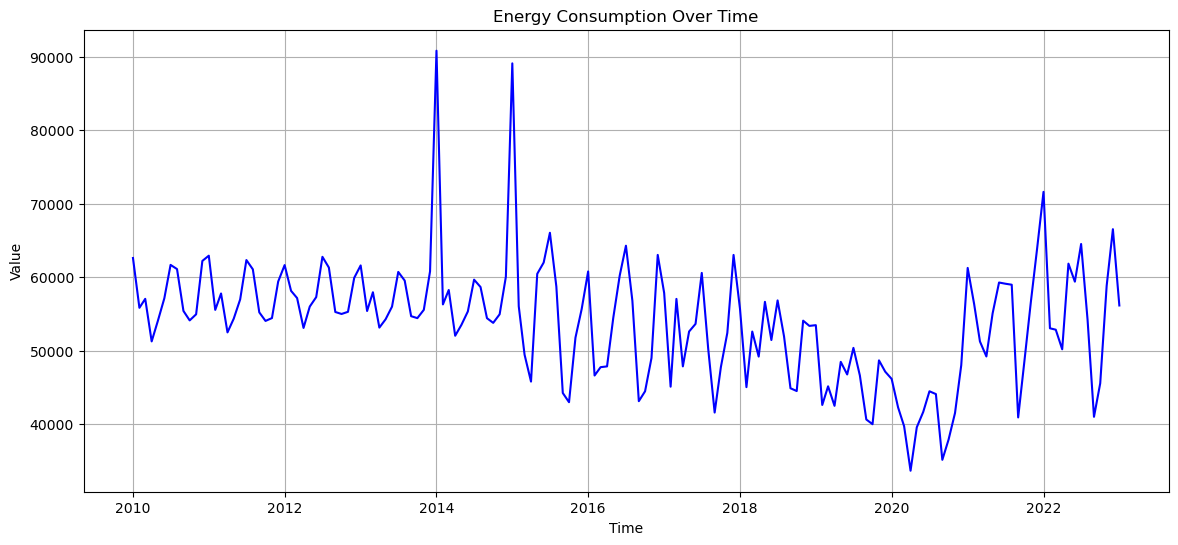

In [555]:
plt.figure(figsize=(14, 6))
plt.plot(energy['Value'], color='blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


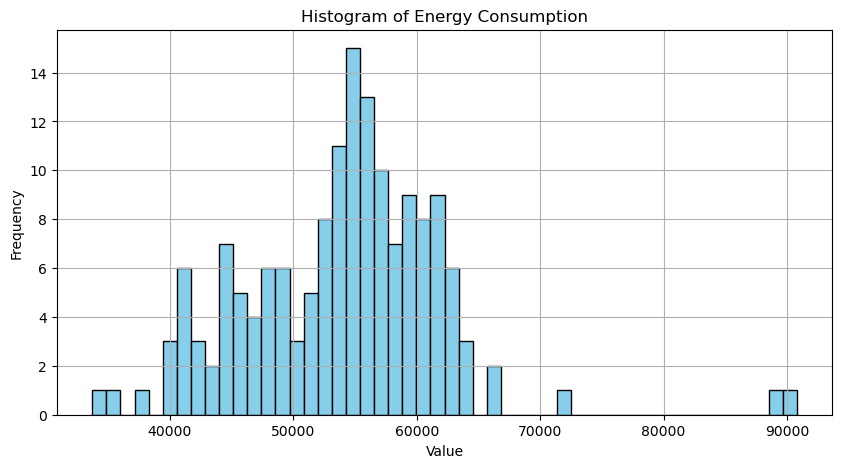

In [557]:
plt.figure(figsize=(10, 5))
plt.hist(energy['Value'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Energy Consumption')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [559]:
#Checking Mean and Variance over small chunks

In [561]:
import numpy as np

# Define number of chunks
num_chunks = 2

# Get chunk size
chunk_size = len(energy) // num_chunks

# Loop over chunks
for i in range(num_chunks):
    chunk = energy['Value'][i*chunk_size : (i+1)*chunk_size]
    print(f"Chunk {i+1} | Mean: {chunk.mean():.2f}, Variance: {chunk.var():.2f}")


Chunk 1 | Mean: 57179.22, Variance: 48627057.92
Chunk 2 | Mean: 50705.59, Variance: 63413981.30


In [563]:
#Likely not Stationary due to significant drop in mean and variance increase.

In [565]:
from statsmodels.tsa.stattools import adfuller

# Run the ADF test
result = adfuller(energy['Value'])

# Print results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("\nCritical Values:")
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretation
if result[1] < 0.05:
    print("\n✅ The time series is stationary (p < 0.05).")
else:
    print("\n⚠️ The time series is not stationary (p ≥ 0.05).")


ADF Statistic: -1.678124807859974
p-value: 0.4424170080065793
Number of Lags Used: 12
Number of Observations Used: 144

Critical Values:
   1%: -3.476597917537401
   5%: -2.8818291230495543
   10%: -2.5775887982253085

⚠️ The time series is not stationary (p ≥ 0.05).


In [567]:
from statsmodels.tsa.stattools import kpss

# KPSS Test
kpss_stat, p_value, lags, critical_values = kpss(energy['Value'], regression='c')

print("KPSS Statistic:", kpss_stat)
print("p-value:", p_value)
print("Lags Used:", lags)
print("\nCritical Values:")
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpretation
if p_value < 0.05:
    print("\n⚠️ The time series is not stationary (KPSS p < 0.05).")
else:
    print("\n✅ The time series is stationary (KPSS p ≥ 0.05).")


KPSS Statistic: 1.0760679853054151
p-value: 0.01
Lags Used: 5

Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

⚠️ The time series is not stationary (KPSS p < 0.05).


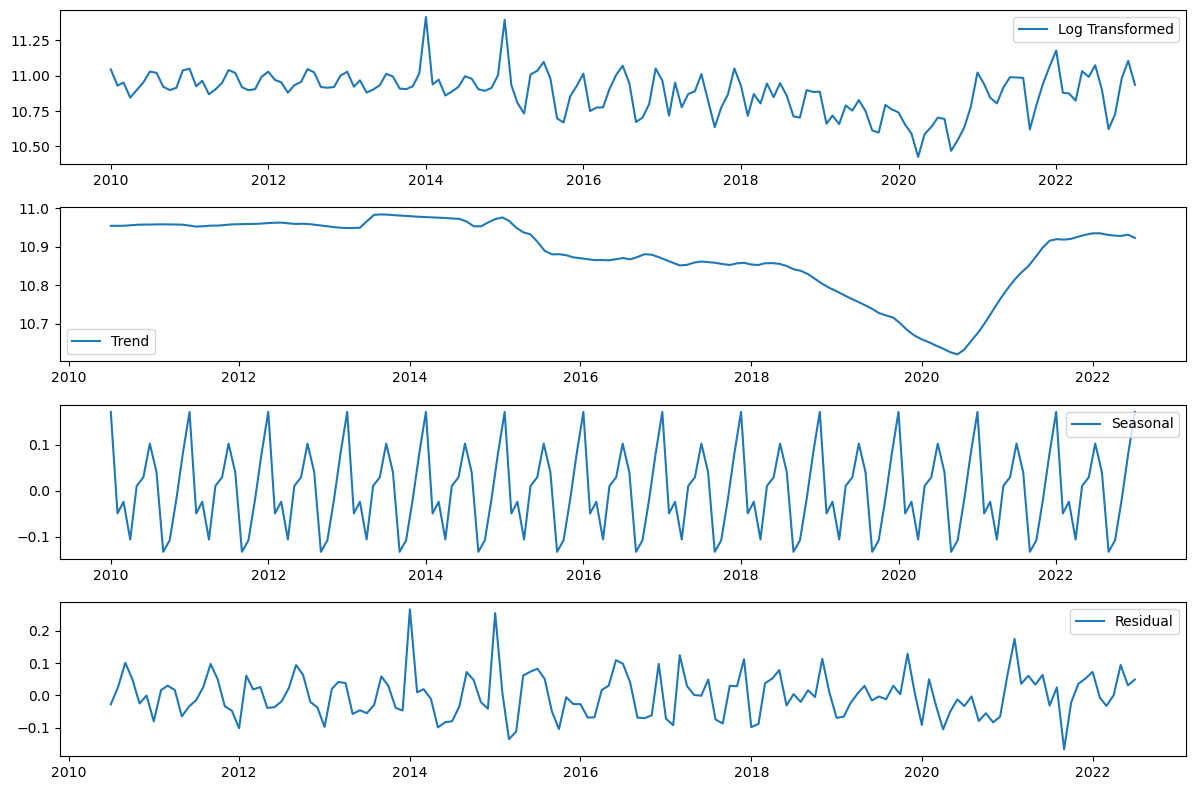

In [569]:
# Step 1: Log transform
energy_log = np.log(energy['Value'])

# Step 2: Decompose the log-transformed data
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_log = seasonal_decompose(energy_log, model='additive', period=12)

# Step 3: Plot
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(energy_log, label='Log Transformed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition_log.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition_log.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition_log.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


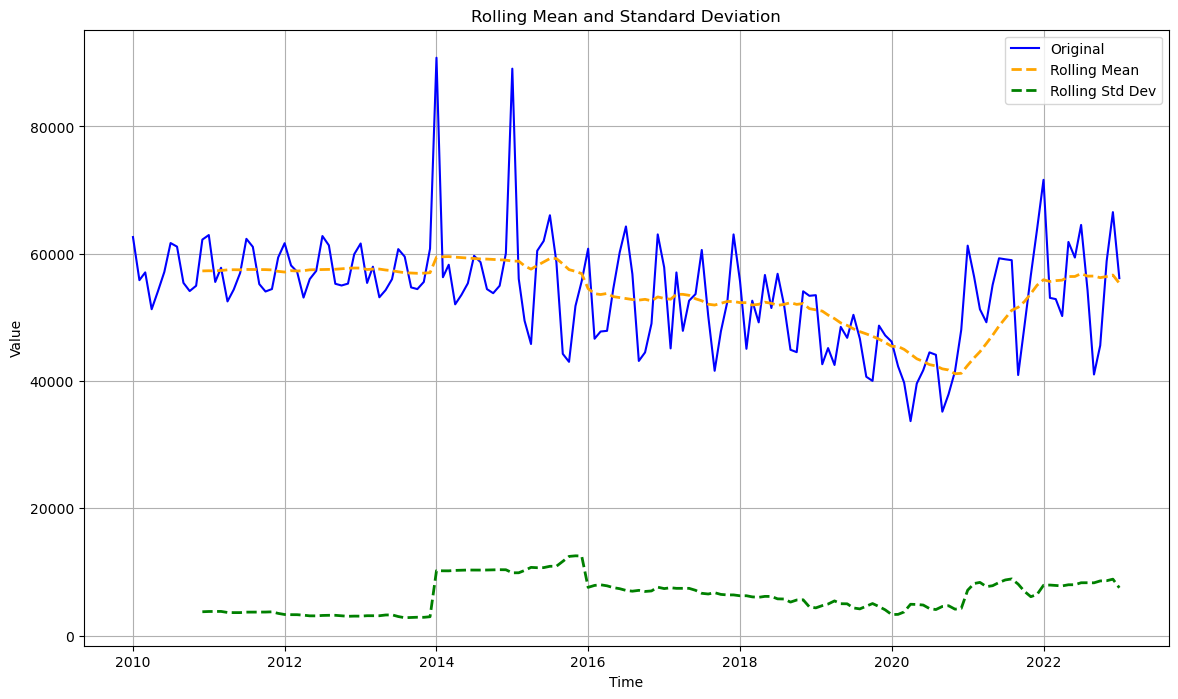

In [570]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming energy['Value'] is your time series data
# Set the window size for the rolling statistics
window_size = 12  # You can change this to any window size that makes sense for your data

# Calculate the rolling mean and rolling standard deviation
rolling_mean = energy['Value'].rolling(window=window_size).mean()
rolling_std = energy['Value'].rolling(window=window_size).std()

# Plot the original time series along with the rolling mean and rolling standard deviation
plt.figure(figsize=(14, 8))

plt.plot(energy['Value'], label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='orange', linestyle='--', linewidth=2)
plt.plot(rolling_std, label='Rolling Std Dev', color='green', linestyle='--', linewidth=2)

plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()


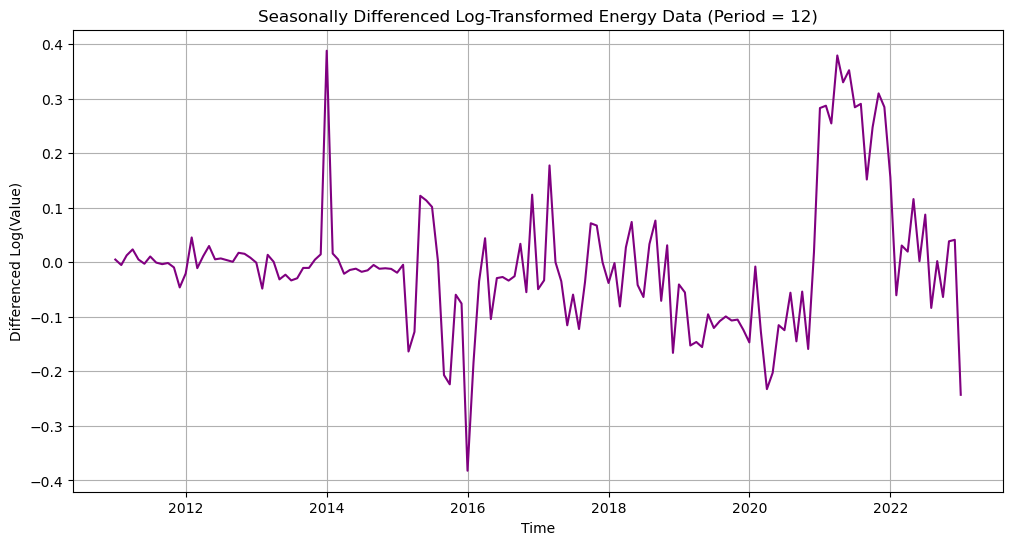

In [571]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Log transform the original data
energy_log = np.log(energy['Value'])

# Apply seasonal differencing (e.g., period = 12 for monthly seasonality)
energy_log_seasonal_diff = energy_log.diff(12).dropna()

# Plot the seasonally differenced log-transformed series
plt.figure(figsize=(12, 6))
plt.plot(energy_log_seasonal_diff, color='purple')
plt.title('Seasonally Differenced Log-Transformed Energy Data (Period = 12)')
plt.xlabel('Time')
plt.ylabel('Differenced Log(Value)')
plt.grid(True)
plt.show()


In [574]:
adf_result = adfuller(energy_log_seasonal_diff)
print("\n🔹 ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, value in adf_result[4].items():
    print(f"   Critical Value ({key}): {value}")
if adf_result[1] < 0.05:
    print("✅ ADF: The series is likely stationary.")
else:
    print("⚠️ ADF: The series may not be stationary.")

# --- KPSS Test ---
kpss_stat, kpss_p, lags, crit = kpss(energy_log_seasonal_diff, regression='c', nlags='auto')
print("\n🔹 KPSS Test Results:")
print(f"KPSS Statistic: {kpss_stat}")
print(f"p-value: {kpss_p}")
for key, value in crit.items():
    print(f"   Critical Value ({key}): {value}")
if kpss_p > 0.05:
    print("✅ KPSS: The series is likely stationary.")
else:
    print("⚠️ KPSS: The series may not be stationary.")


🔹 ADF Test Results:
ADF Statistic: -4.046765096216826
p-value: 0.001184490499892117
   Critical Value (1%): -3.4769274060112707
   Critical Value (5%): -2.8819726324025625
   Critical Value (10%): -2.577665408088415
✅ ADF: The series is likely stationary.

🔹 KPSS Test Results:
KPSS Statistic: 0.15432375858146946
p-value: 0.1
   Critical Value (10%): 0.347
   Critical Value (5%): 0.463
   Critical Value (2.5%): 0.574
   Critical Value (1%): 0.739
✅ KPSS: The series is likely stationary.


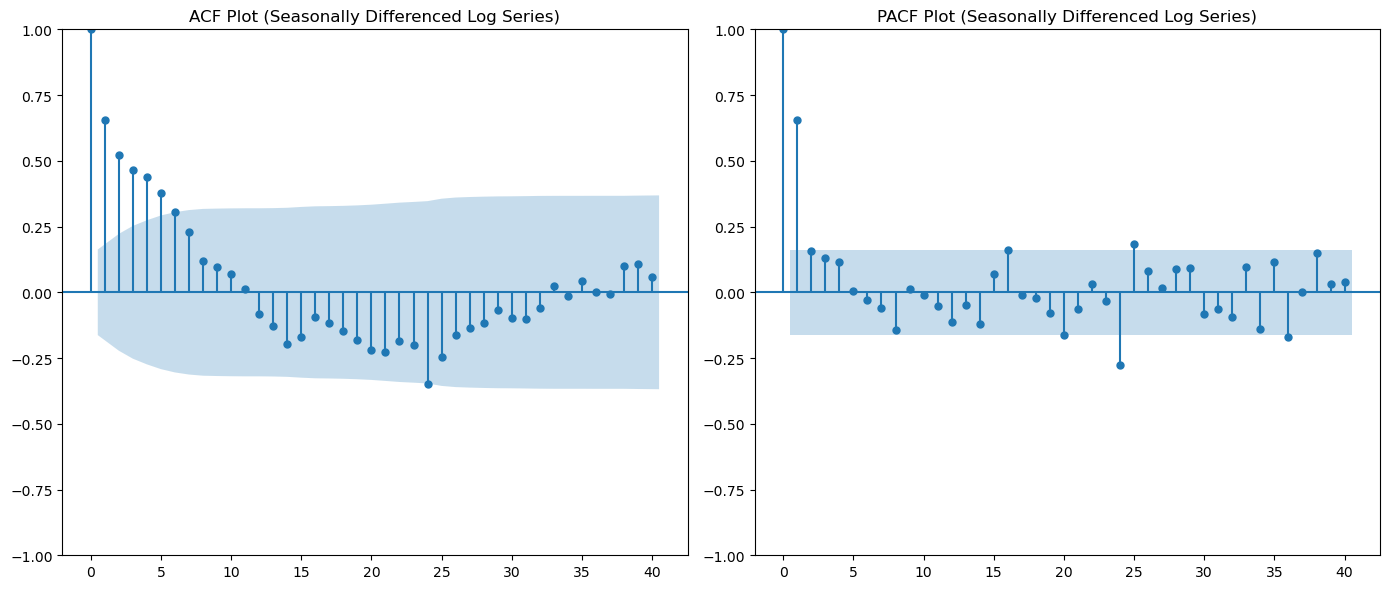

In [577]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Ensure energy_log_seasonal_diff is already defined
# This assumes you've already done:
# energy_log = np.log(energy['Value'])
# energy_log_seasonal_diff = energy_log.diff(12).dropna()

# ACF and PACF Plots
plt.figure(figsize=(14, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(energy_log_seasonal_diff, lags=40, ax=plt.gca())
plt.title("ACF Plot (Seasonally Differenced Log Series)")

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(energy_log_seasonal_diff, lags=40, ax=plt.gca(), method='ywm')
plt.title("PACF Plot (Seasonally Differenced Log Series)")

plt.tight_layout()
plt.show()


In [578]:
import pmdarima as pm

# Assuming `energy_log` is your log-transformed series
# and seasonal=True since you’ve observed seasonality

model = pm.auto_arima(
    energy_log,
    seasonal=True,
    m=12,  # Monthly seasonality
    trace=True,
    suppress_warnings=True,
    stepwise=True
)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-295.099, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-169.476, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-286.720, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-272.707, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-171.472, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-289.632, Time=0.32 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-299.049, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-231.078, Time=0.11 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-297.746, Time=0.97 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-295.092, Time=0.96 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-300.887, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-209.419, Time=0.09 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=-299.168, Time=1.27 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-300.640, Time=0.33 sec
 ARIMA(1,1,2)(0,0,1

In [580]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA(0,1,2)(1,0,0,12)
sarima_model = SARIMAX(energy_log, 
                       order=(0, 1, 2), 
                       seasonal_order=(1, 0, 0, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit()
print(sarima_results.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.92915D-01    |proj g|=  2.95490D+00

At iterate    5    f= -8.97955D-01    |proj g|=  3.33712D+00

At iterate   10    f= -9.17616D-01    |proj g|=  4.31887D-02

At iterate   15    f= -9.18376D-01    |proj g|=  1.00721D-02

At iterate   20    f= -9.18382D-01    |proj g|=  5.07461D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     28      1     0     0   5.486D-05  -9.184D-01
  F = -0.91838168719487701     

CONVERG

 This problem is unconstrained.


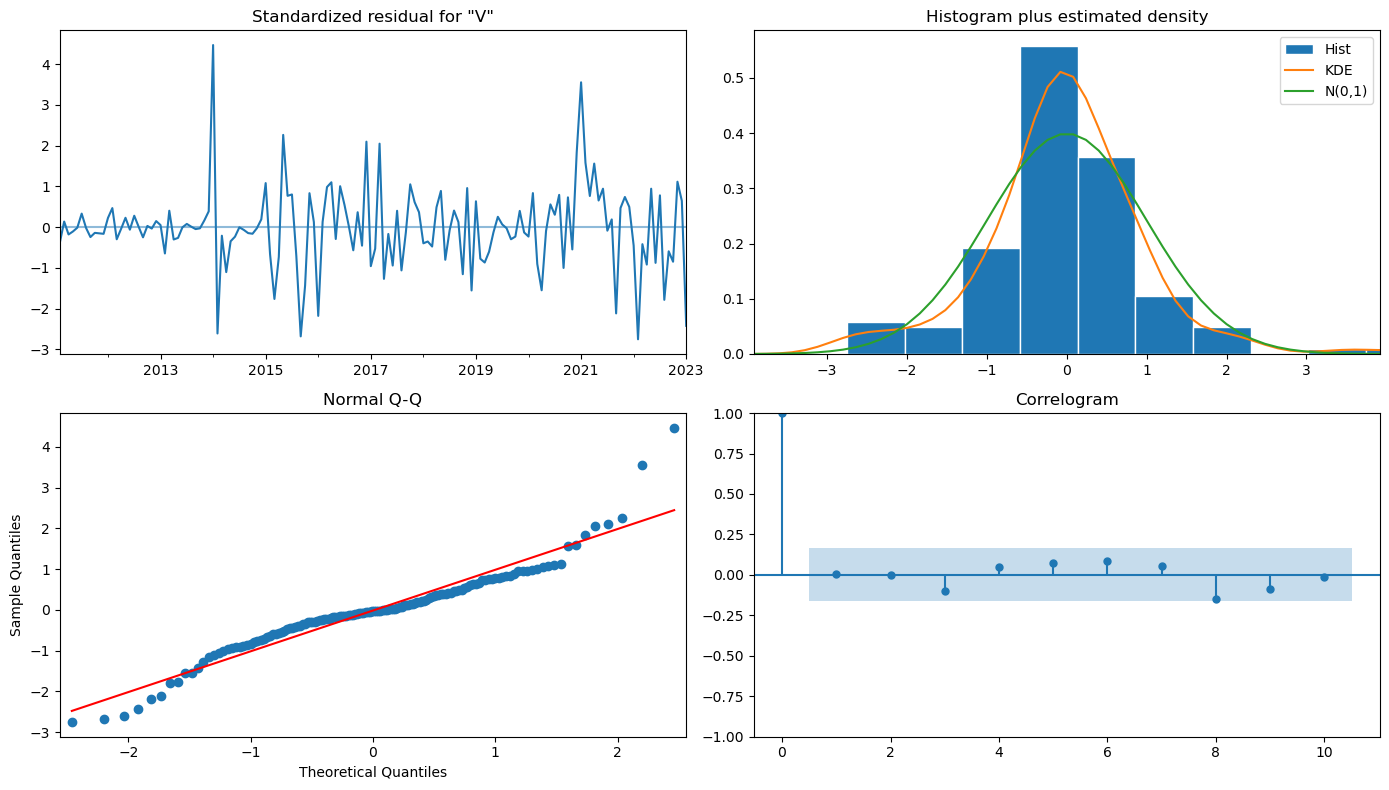

In [581]:
sarima_results.plot_diagnostics(figsize=(14, 8))
plt.tight_layout()
plt.show()


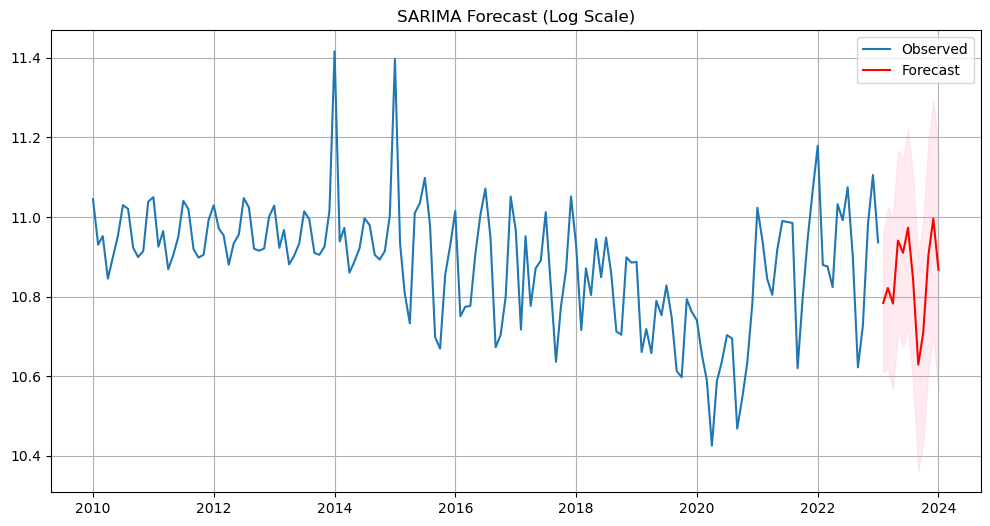

In [582]:
forecast_steps = 12
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Extract prediction and confidence intervals
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(energy_log, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('SARIMA Forecast (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()


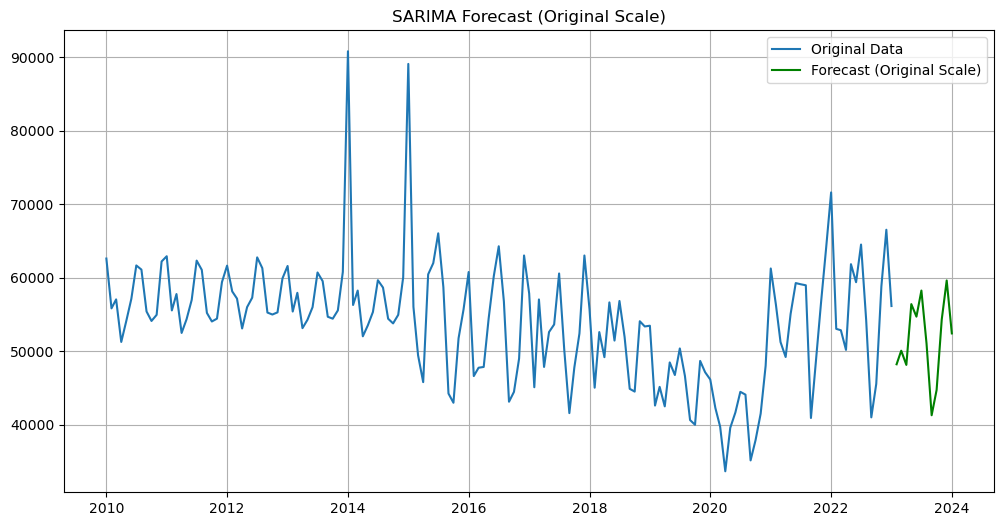

In [583]:
forecast_original_scale = np.exp(forecast_mean)

plt.figure(figsize=(12, 6))
plt.plot(energy['Value'], label='Original Data')
plt.plot(forecast_original_scale, label='Forecast (Original Scale)', color='green')
plt.title('SARIMA Forecast (Original Scale)')
plt.legend()
plt.grid(True)
plt.show()


In [584]:
# Define train and test sets
train = energy_log.iloc[:-12]
test = energy_log.iloc[-12:]


In [585]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,
                order=(0, 1, 2),
                seasonal_order=(1, 0, 0, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.25521D-01    |proj g|=  3.39969D+00

At iterate    5    f= -9.48756D-01    |proj g|=  1.06621D-01

At iterate   10    f= -9.49182D-01    |proj g|=  2.82607D-01

At iterate   15    f= -9.49955D-01    |proj g|=  2.25790D-02

At iterate   20    f= -9.49958D-01    |proj g|=  1.43277D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     37      1     0     0   1.433D-04  -9.500D-01
  F = -0.94995768632923239     

CONVERG

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [586]:
# Forecast the next 12 steps
forecast_log = model_fit.get_forecast(steps=12)
forecast_mean_log = forecast_log.predicted_mean
conf_int_log = forecast_log.conf_int()


In [587]:
# Convert back from log scale
forecast_original = np.exp(forecast_mean_log)
test_original = np.exp(test)


In [588]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(test_original, forecast_original))
mae = mean_absolute_error(test_original, forecast_original)
mape = np.mean(np.abs((test_original - forecast_original) / test_original)) * 100

# Accuracy as 100 - MAPE
accuracy = 100 - mape

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'Accuracy: {accuracy:.2f}%')

RMSE: 13480.41
MAE: 12418.91
MAPE: 23.27%
Accuracy: 76.73%


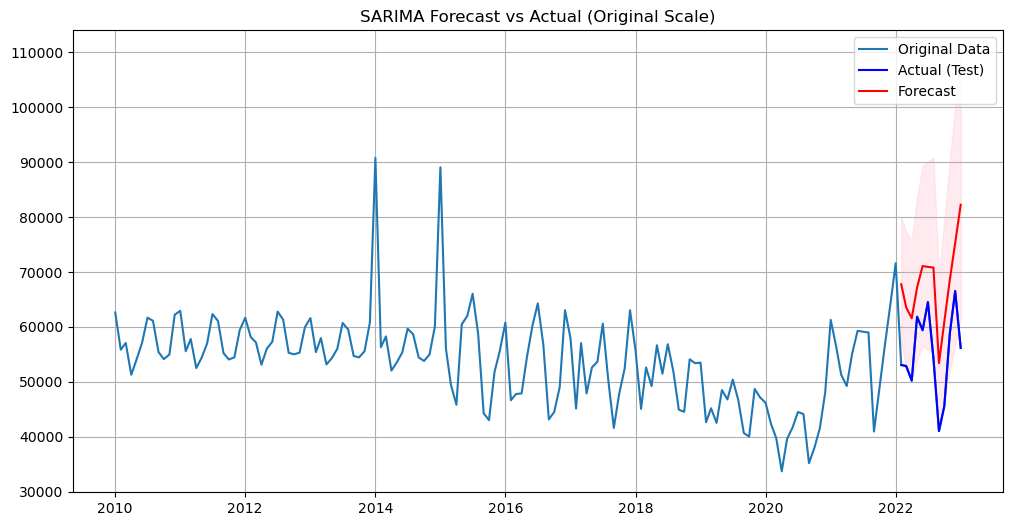

In [589]:
plt.figure(figsize=(12, 6))
plt.plot(energy['Value'], label='Original Data')
plt.plot(test.index, test_original, label='Actual (Test)', color='blue')
plt.plot(test.index, forecast_original, label='Forecast', color='red')
plt.fill_between(test.index, 
                 np.exp(conf_int_log.iloc[:, 0]), 
                 np.exp(conf_int_log.iloc[:, 1]), 
                 color='pink', alpha=0.3)
plt.title('SARIMA Forecast vs Actual (Original Scale)')
plt.legend()
plt.grid(True)
plt.show()


20:44:10 - cmdstanpy - INFO - Chain [1] start processing
20:44:10 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 5061.88
Prophet MAE: 4467.34
Prophet MAPE: 8.07%
Prophet Accuracy: 91.93%


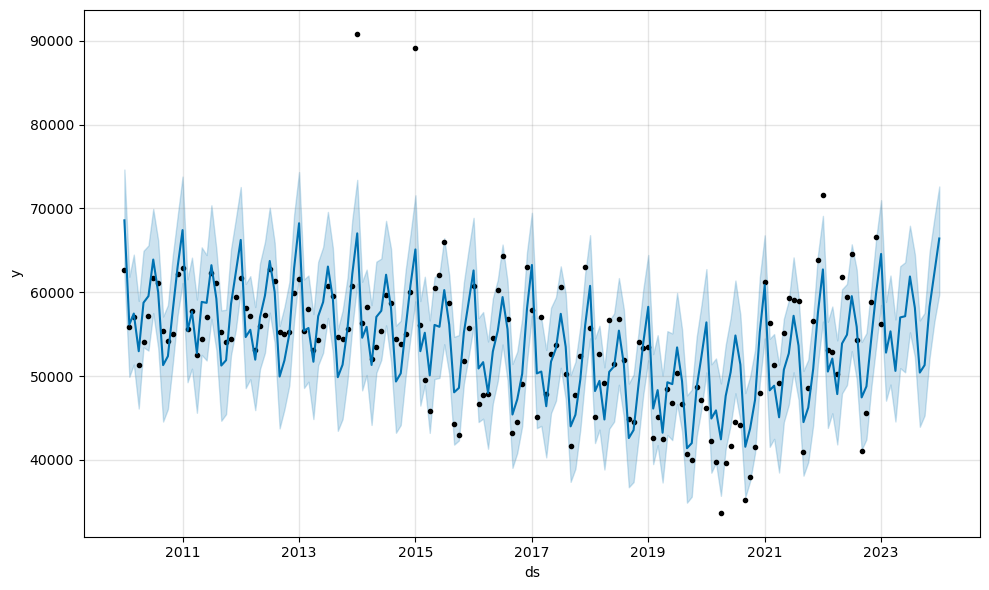

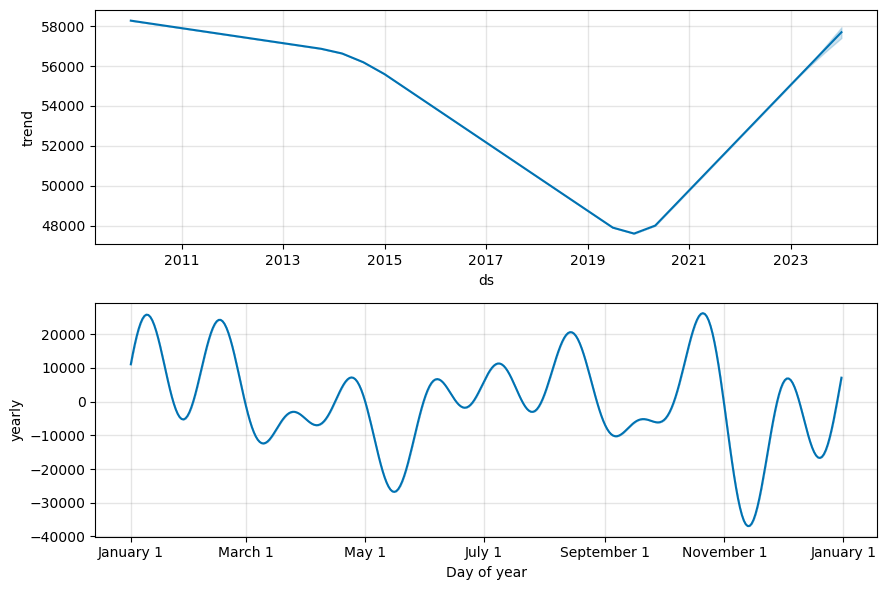

In [590]:
from prophet import Prophet
import pandas as pd

# Prepare data for Prophet
df_prophet = energy.reset_index()[['Time', 'Value']]
df_prophet.columns = ['ds', 'y']

# Initialize and fit the model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create future dataframe
future = prophet_model.make_future_dataframe(periods=12, freq='MS')  # Monthly steps
forecast = prophet_model.predict(future)

# Plot forecast
fig1 = prophet_model.plot(forecast)
fig2 = prophet_model.plot_components(forecast)

# Evaluate on test data
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[test_original.index]
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_prophet = mean_squared_error(test_original, predicted['yhat'], squared=False)
mae_prophet = mean_absolute_error(test_original, predicted['yhat'])
mape_prophet = np.mean(np.abs((test_original.values - predicted['yhat'].values) / test_original.values)) * 100
accuracy_prophet = 100 - mape_prophet

print(f"Prophet RMSE: {rmse_prophet:.2f}")
print(f"Prophet MAE: {mae_prophet:.2f}")
print(f"Prophet MAPE: {mape_prophet:.2f}%")
print(f"Prophet Accuracy: {accuracy_prophet:.2f}%")


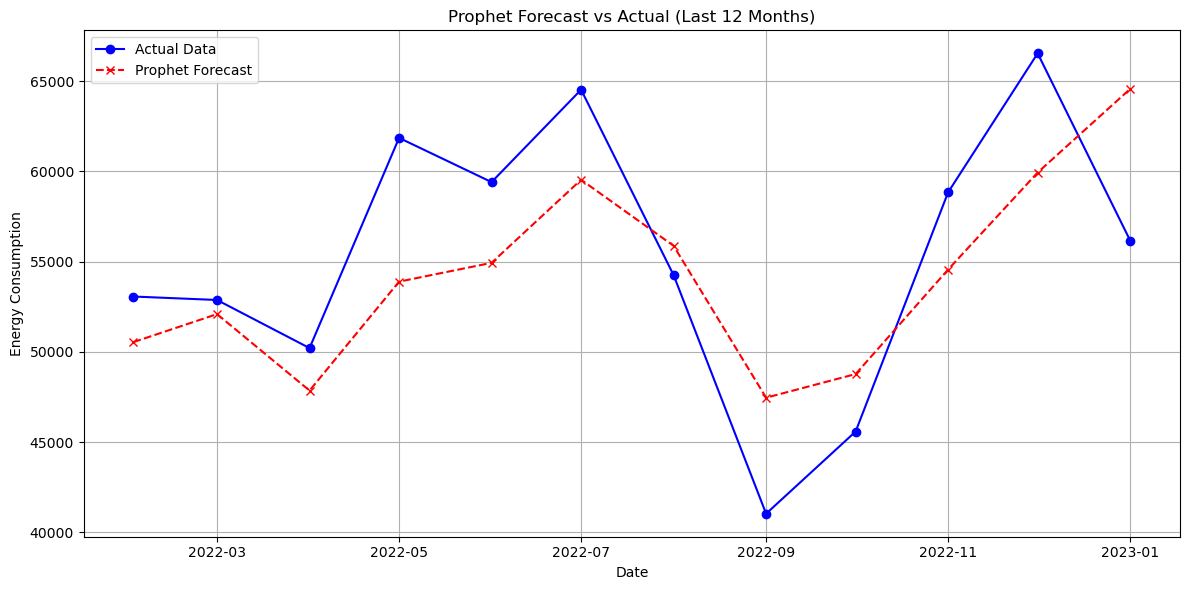

In [591]:
import matplotlib.pyplot as plt

# Align indices: get actual and forecast values for last 12 months
actual_series = test_original.copy()
forecast_series = predicted['yhat']

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(actual_series, label='Actual Data', color='blue', marker='o')
plt.plot(forecast_series, label='Prophet Forecast', color='red', linestyle='--', marker='x')
plt.title('Prophet Forecast vs Actual (Last 12 Months)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()..


In [592]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(energy[['Value']])

# Create sequences
def create_sequences(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i - window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_sequences(scaled_data, window_size)

# Train-test split (last 12 for testing)
X_train, y_train = X[:-12], y[:-12]
X_test, y_test = X[-12:], y[-12:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, verbose=0)

# Forecast
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
rmse_lstm = mean_squared_error(y_test_rescaled, y_pred_rescaled, squared=False)
mae_lstm = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mape_lstm = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
accuracy_lstm = 100 - mape_lstm

print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"LSTM MAE: {mae_lstm:.2f}")
print(f"LSTM MAPE: {mape_lstm:.2f}%")
print(f"LSTM Accuracy: {accuracy_lstm:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
LSTM RMSE: 7411.26
LSTM MAE: 6129.49
LSTM MAPE: 11.64%
LSTM Accuracy: 88.36%


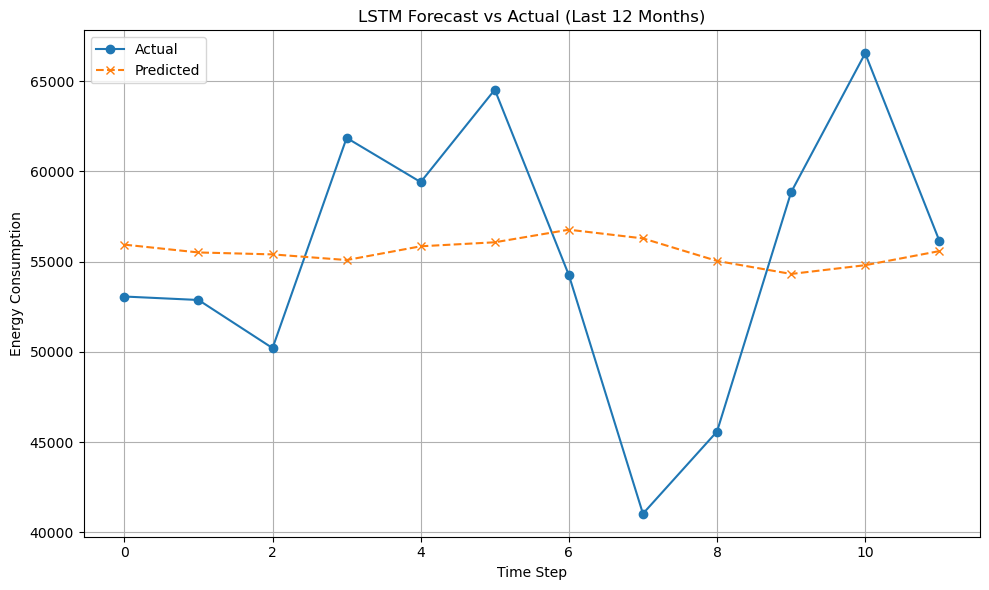

In [593]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual', marker='o')
plt.plot(y_pred_rescaled, label='Predicted', marker='x', linestyle='--')
plt.title('LSTM Forecast vs Actual (Last 12 Months)')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


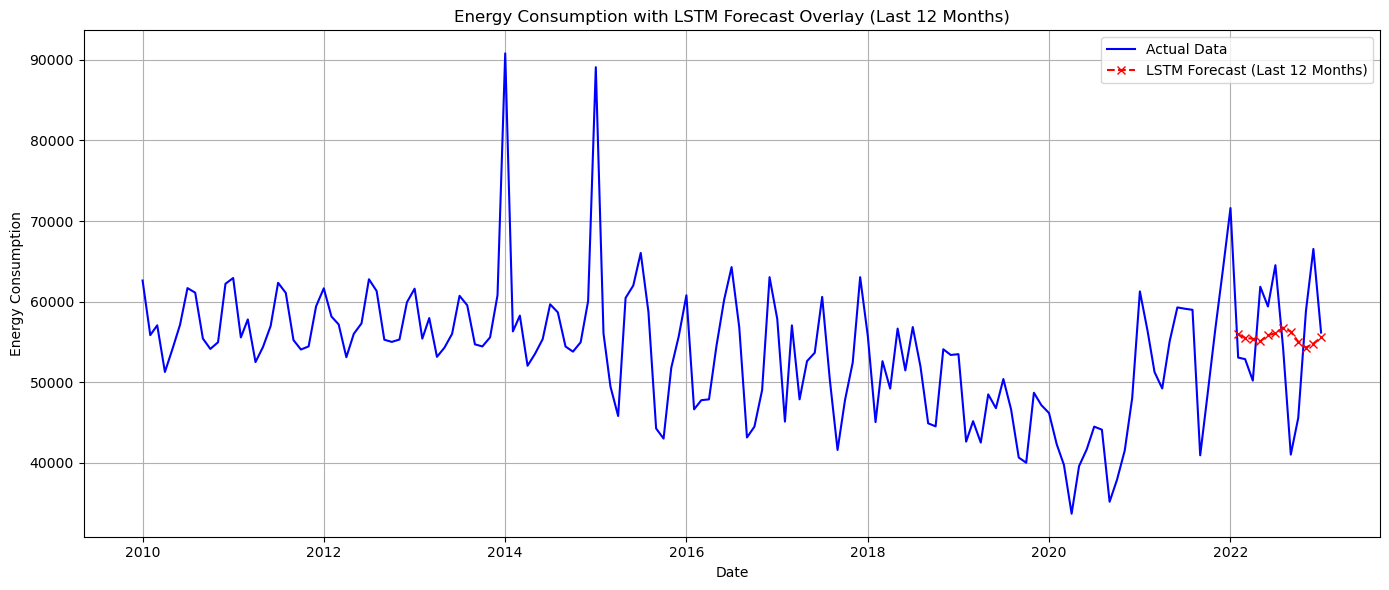

In [594]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the original index (dates) for the last 12 months
lstm_pred_index = energy.index[-12:]

# Create a full series for plotting
actual_series = energy['Value']
predicted_series = pd.Series(data=y_pred_rescaled.flatten(), index=lstm_pred_index)

# Plot full series + predicted last 12 months
plt.figure(figsize=(14, 6))
plt.plot(actual_series, label='Actual Data', color='blue')
plt.plot(predicted_series, label='LSTM Forecast (Last 12 Months)', color='red', linestyle='--', marker='x')
plt.title('Energy Consumption with LSTM Forecast Overlay (Last 12 Months)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [595]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# ----- PREPROCESSING -----
values = energy[['Value']].values
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# ----- CREATE SEQUENCES -----
def create_sequences(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i - window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 24  # capturing 2 years of monthly data
X, y = create_sequences(scaled_values, window_size)

# Train-test split: last 12 as test
X_train, y_train = X[:-12], y[:-12]
X_test, y_test = X[-12:], y[-12:]

# Reshape to 3D (samples, timesteps, features)
X_train = X_train.reshape((-1, window_size, 1))
X_test = X_test.reshape((-1, window_size, 1))

# ----- LSTM MODEL -----
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(32),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train with EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[early_stop])

# ----- FORECASTING -----
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1173  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0194
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0174 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 
Epoch 16/100
4/4 ━━━━━━━

In [596]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae_lstm = mean_absolute_error(y_test_actual, y_pred)
mape_lstm = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100
accuracy_lstm = 100 - mape_lstm

print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"LSTM MAE: {mae_lstm:.2f}")
print(f"LSTM MAPE: {mape_lstm:.2f}%")
print(f"LSTM Accuracy: {accuracy_lstm:.2f}%")


LSTM RMSE: 7834.89
LSTM MAE: 6383.47
LSTM MAPE: 12.46%
LSTM Accuracy: 87.54%


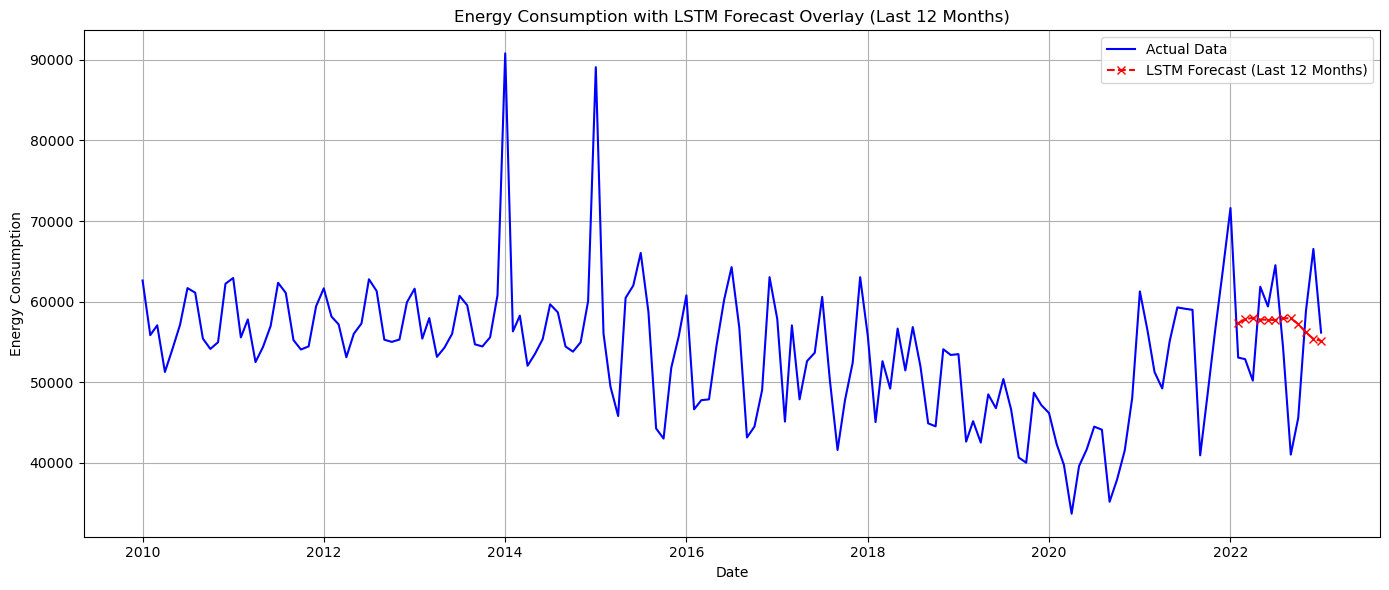

In [597]:
# Align with original index
lstm_forecast_index = energy.index[-12:]
actual_series = energy['Value']
forecast_series = pd.Series(data=y_pred.flatten(), index=lstm_forecast_index)

# Plot full series and overlay predictions
plt.figure(figsize=(14, 6))
plt.plot(actual_series, label='Actual Data', color='blue')
plt.plot(forecast_series, label='LSTM Forecast (Last 12 Months)', color='red', linestyle='--', marker='x')
plt.title('Energy Consumption with LSTM Forecast Overlay (Last 12 Months)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
